In [31]:
# 导入模块
import numpy as np
import matplotlib.pyplot as plt

In [32]:
class OutputLayer:
    def __init__(self, n_upper, n):                         # 初始化设置
        self.w = wb_width * np.random.randn(n_upper, n)     # 权重 (矩阵)
        self.b = wb_width * np.random.randn(n)              # 偏置 (向量)

    def forward(self, x):                                   # 正向传播
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = u                                          # 恒等函数

    def backward(self, t):                                  # 反向传播
        delta = self.y - t

        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)

    def update(self, eta):                                  # 权重和偏置的更新
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [33]:
# --中间层--
class MiddleLayer:
    def __init__ (self,n_upper, n):                             # 初始化设置
        self.w = wb_width * np.random.randn(n_upper, n)         # 权重 (矩阵)
        self.b = wb_width * np.random.randn(n)                  # 偏置 (向量)
    def forward(self,x):                                        # 正向传播
        self.x = x
        u = np.dot(x, self.w) + self.b                          # 中间层的净输入
        self.y = 1 / (1 + np.exp(-u))                           # sigmoid函数
    def backward(self,grad_y):                                  # 反向传播
        delta = grad_y * (1-self.y) * self.y                    # sigmoid函数的微分
        self.grad_w = np.dot(self.x.T, delta)                   # 根据推导公式结果
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T)
    def update(self,eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [34]:
# 设置参数
wb_width = 0.01     # 权重和偏置的初始范围
epoch = 10000        # 迭代次数
n_data = 100        # 数据点数量
eta = 0.1           # 学习率
interval = 1000      # 每隔多少次迭代可视化一次
n_in = 1            # 输入层维度
n_mid = 5           # 中间层维度
n_out = 1           # 输出层维度

# 生成输入数据和正确答案
input_data = np.linspace(0, 2 * np.pi, n_data)
correct_data = np.sin(input_data)

In [35]:
# -- 各个网络层的初始化 - -
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

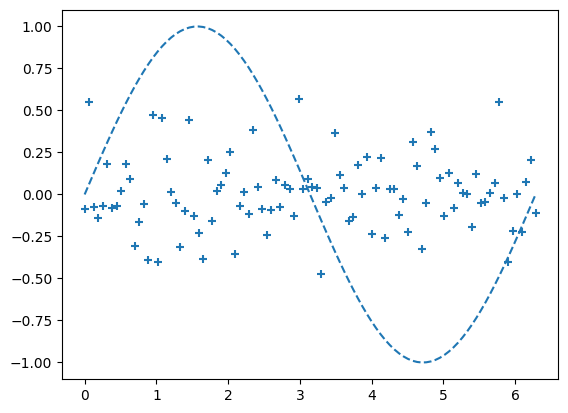

Epoch:0/10000 Error:0.2800034151828436


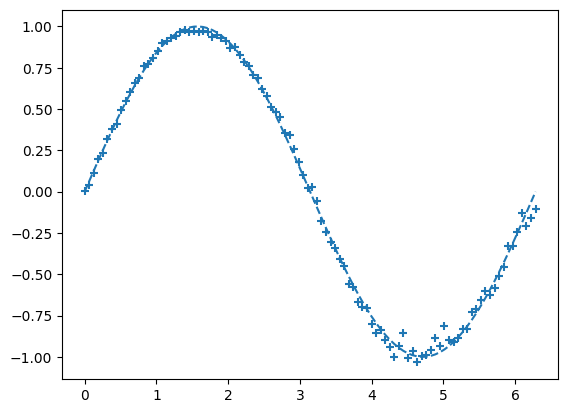

Epoch:1000/10000 Error:0.0007022274981277675


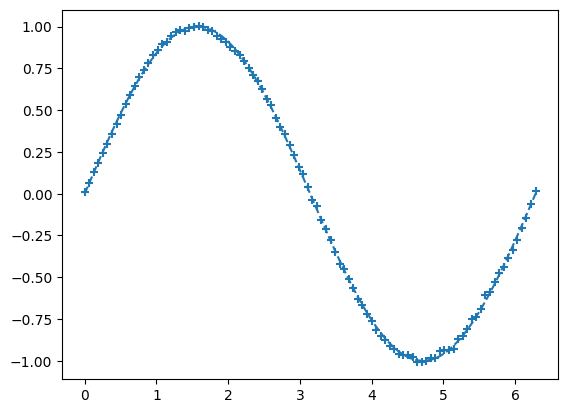

Epoch:2000/10000 Error:7.702804428528516e-05


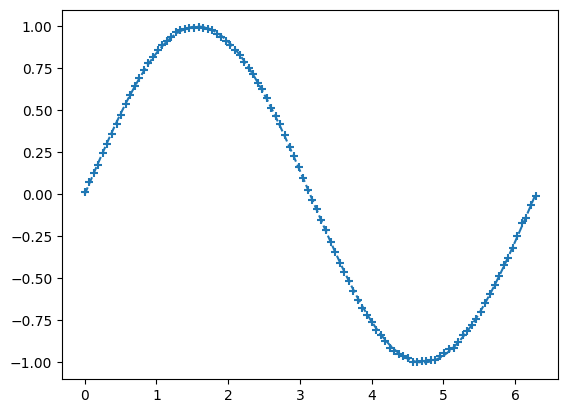

Epoch:3000/10000 Error:2.822368478223807e-05


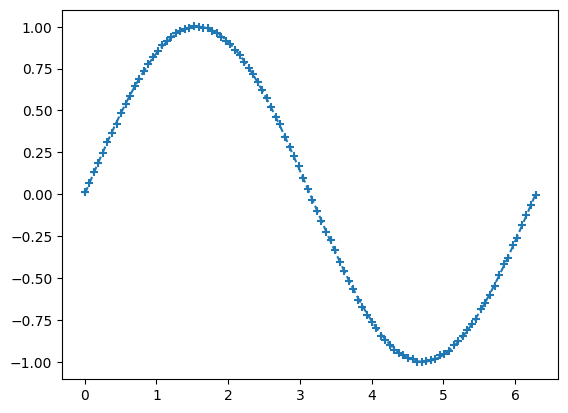

Epoch:4000/10000 Error:1.7594865548976718e-05


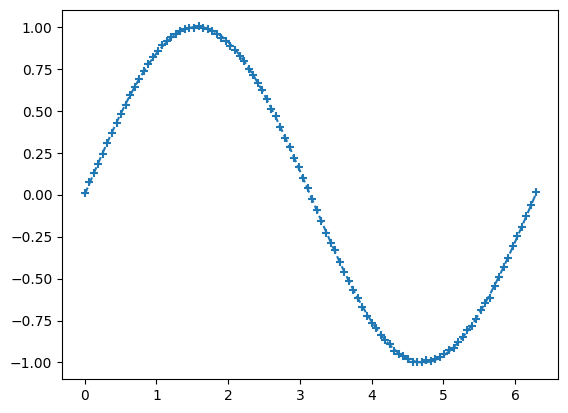

Epoch:5000/10000 Error:1.5749917445973743e-05


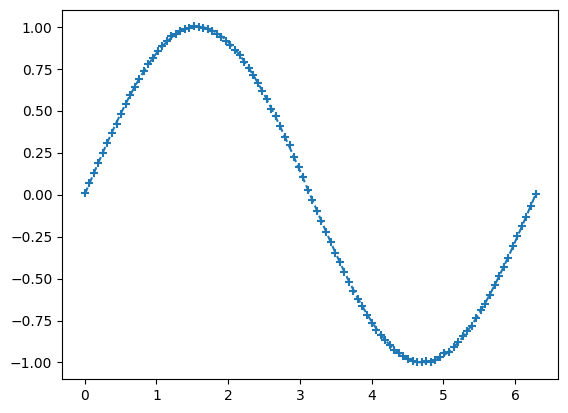

Epoch:6000/10000 Error:1.1366839177186796e-05


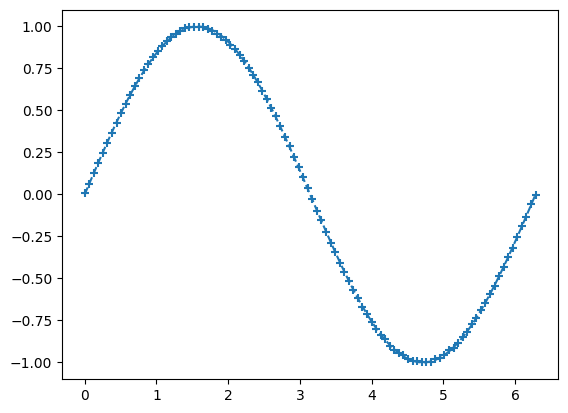

Epoch:7000/10000 Error:7.33217867198414e-06


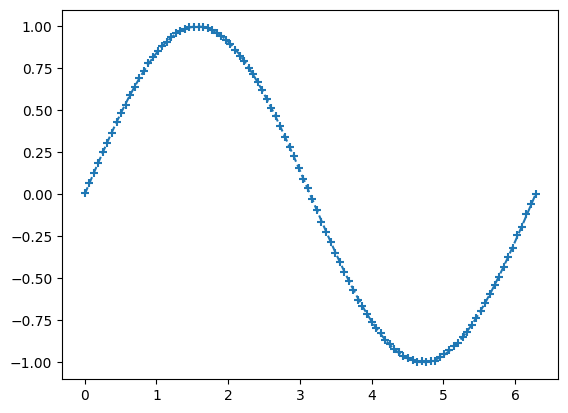

Epoch:8000/10000 Error:8.264967489210453e-06


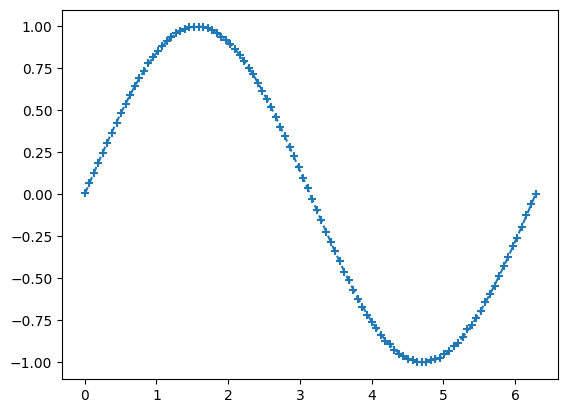

Epoch:9000/10000 Error:7.470058128202904e-06


In [36]:
# --学习--
for i in range(epoch):
    #随机打乱索引值
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)

    # 用于结果显示
    total_error = 0
    plot_x = []
    plot_y = []

    for idx in index_random:                # 输入
        x = input_data[idx:idx+1]           # 正确答案
        t = correct_data[idx:idx+1]   
        
        #正向传播
        middle_layer.forward(x.reshape(1,1))    # 将输入转换为矩阵
        
        output_layer.forward(middle_layer.y)    # 反向传播
        
        output_layer.backward(t.reshape(1,1))   # 将正确答案转换为矩阵
        middle_layer.backward(output_layer.grad_x)
        
        #权重和偏置的更新
        middle_layer.update(eta)
        output_layer.update(eta)
        if i%interval == 0:
            y = output_layer.y.reshape(-1)
            #将矩阵还原成向量
            #误差的计算
            total_error += 1./2.*np.sum(np.square(y-t)) # 平方和误差
            # 输出记录
            plot_x.append(x)
            plot_y.append(y)
    if i%interval == 0:
        #用图表显示输出
        plt.plot(input_data, correct_data, linestyle="dashed")
        plt.scatter(plot_x, plot_y, marker="+")
        plt.show()
        #显示epoch次数和误差
        print("Epoch:" + str(i) + "/" + str(epoch),"Error:" + str(total_error/n_data))